# DataStream Class - Jupyter Notebook Guide

This notebook demonstrates the usage of the `DataStream` class, which provides methods for analyzing time-series data.

### Features:
- **Trimming**: Identifies steady-state regions in data.
- **Statistical Analysis**: Computes mean, standard deviation, confidence intervals, and cumulative statistics.
- **Stationarity Testing**: Uses the Augmented Dickey-Fuller test.
- **Effective Sample Size (ESS)**: Estimates the independent sample size.
- **Optimal Window Size**: Determines the best window for data smoothing.


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
import os

# Path to the "src/quends" directory
src_path = os.path.abspath(os.path.join(os.getcwd(), '../../src/quends'))
if src_path not in sys.path:
    sys.path.append(src_path)

# Now we can import DataStream
from base.data_stream import DataStream
from preprocessing.csv import from_csv
from preprocessing.netcdf import from_netcdf

from postprocessing.plotter import Plotter
from postprocessing.exporter import Exporter

### SIMPLE WORKFLOW

In [2]:
# Specify the file paths
tprim_2_0 = "gx/tprim_2_0.out.nc" 
tprim_2_1 = "gx/tprim_2_1.out.nc" 
tprim_2_2 = "gx/tprim_2_2.out.nc" 
tprim_2_3 = "gx/tprim_2_3.out.nc" 
tprim_2_4 = "gx/tprim_2_4.out.nc" 
tprim_2_5 = "gx/tprim_2_5.out.nc" 
tprim_2_6 = "gx/tprim_2_6.out.nc" 

In [3]:
# Load Data
data_stream_tprim_2_0 = from_netcdf(tprim_2_0)
data_stream_tprim_2_3 = from_netcdf(tprim_2_3)
data_stream_tprim_2_4 = from_netcdf(tprim_2_4)
data_stream_tprim_2_5 = from_netcdf(tprim_2_5)
data_stream_tprim_2_6 = from_netcdf(tprim_2_6)

### 1. Trace plot

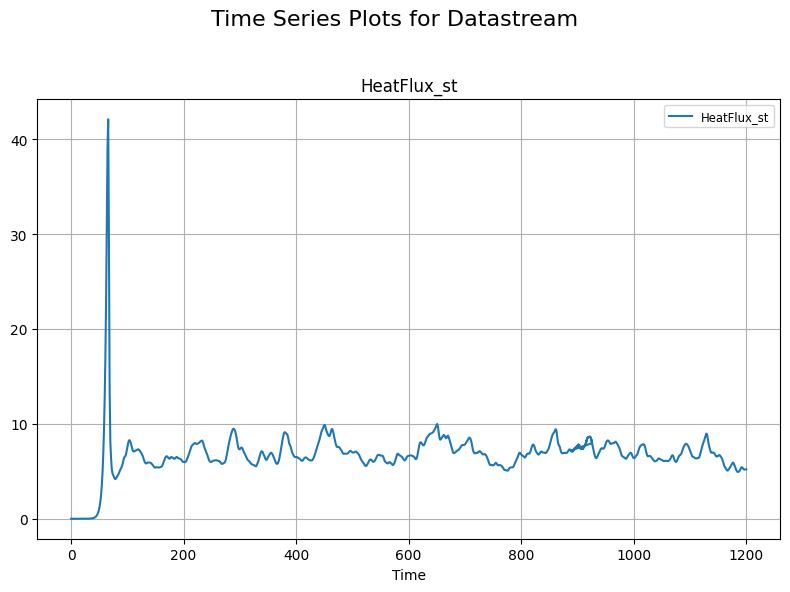

In [4]:
plotter=Plotter()
plotter.trace_plot(data_stream_tprim_2_4,["HeatFlux_st"])

### 2. Stationarity check

In [5]:
# Check if a single column is stationary
data_stream_tprim_2_0.is_stationary("HeatFlux_st")


{'HeatFlux_st': True}

### 3. Steady state estimation

In [6]:
# Trim the data based on the default method (standard deviation method)
trimmed_df = data_stream_tprim_2_4.trim(column_name='HeatFlux_st')
# View trimmed data
trimmed_df.head()


,time,HeatFlux_st
0,183.948976,6.316875
1,185.217502,6.379299
2,186.486029,6.472689
3,187.754555,6.511630
4,189.023081,6.464383


### 4. Visualize steady state start

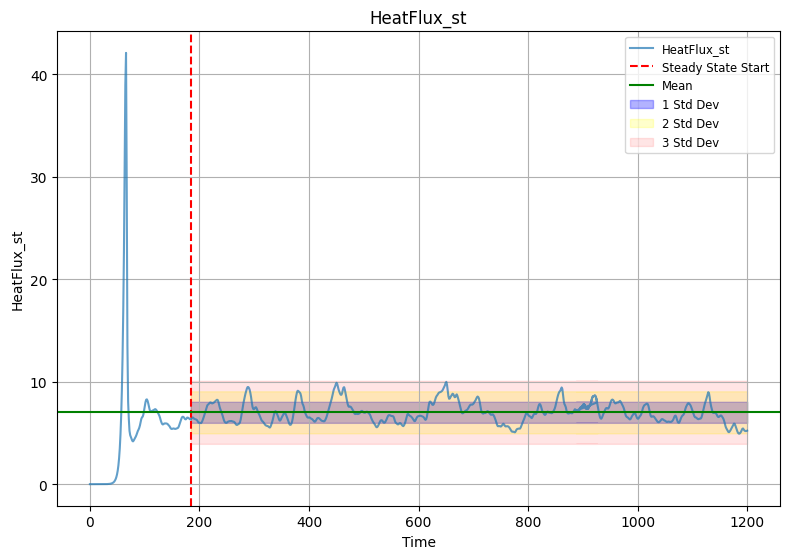

In [7]:
plotter.steady_state_automatic_plot(data_stream_tprim_2_4,["HeatFlux_st"])

### 5. UQ Analysis

In [8]:
trimmed_df.compute_statistics()

{'HeatFlux_st': {'mean': 7.0652156,
  'mean_uncertainty': 0.07664423104860112,
  'confidence_interval': (6.914992894760709, 7.215438280471225),
  'pm_std': (6.988571356567365, 7.141859818664568)}}

In [9]:
## Btch Run

In [10]:
# Import required libraries
import os
import sys
import pandas as pd
import numpy as np

# Add the "src/quends" directory to the system path
src_path = os.path.abspath(os.path.join(os.getcwd(), '../../src/quends'))
if src_path not in sys.path:
    sys.path.append(src_path)

# Import modules from the UQ package
from base.data_stream import DataStream
from preprocessing.csv import from_csv
from preprocessing.netcdf import from_netcdf

def run_uq(file_path, column_name="HeatFlux_st"):
    """
    Process a single file for uncertainty quantification.

    Parameters:
        file_path (str): Path to the netCDF or CSV file.
        column_name (str): Name of the column to process.

    Returns:
        dict: A dictionary with the file name, stationarity check, and computed statistics.
    """
    # Load data based on file extension
    if file_path.endswith(".nc"):
        data_stream = from_netcdf(file_path)
    elif file_path.endswith(".csv"):
        data_stream = from_csv(file_path)
    else:
        raise ValueError(f"Unsupported file type for {file_path}")
    
    # Check if the selected column is stationary
    stationary = data_stream.is_stationary(column_name)
    
    # Trim the data based on the default method (e.g., standard deviation method)
    trimmed_df = data_stream.trim(column_name=column_name)
    
    # Compute statistics (e.g., mean, uncertainty, and confidence intervals)
    stats = trimmed_df.compute_statistics()
    
    # Return the results for further processing
    return {
        "file": file_path,
        "stationary": stationary,
        "stats": stats
    }

def batch_process(file_list, column_name="HeatFlux_st"):
    """
    Process a list of files in batch mode.

    Parameters:
        file_list (list): List of file paths to process.
        column_name (str): Name of the column to process.

    Returns:
        list: A list of dictionaries containing the UQ results for each file.
    """
    results = []
    for file_path in file_list:
        try:
            result = run_uq(file_path, column_name)
            results.append(result)
        except Exception as e:
            print(f"Error processing {file_path}: {e}")
    return results

# Example usage:
if __name__ == "__main__":
    # List of file paths to process
    file_paths = [
        "gx/tprim_2_0.out.nc",
        "gx/tprim_2_1.out.nc",
        "gx/tprim_2_2.out.nc",
        "gx/tprim_2_3.out.nc",
        "gx/tprim_2_4.out.nc",
        "gx/tprim_2_5.out.nc",
        "gx/tprim_2_6.out.nc"
    ]
    
    # Process the files and collect UQ results
    uq_results = batch_process(file_paths, column_name="HeatFlux_st")
    
    # Use the results in further computations or export them
    for result in uq_results:
        print(f"File: {result['file']}")
        print(f"Stationary: {result['stationary']}")
        print(f"Statistics: {result['stats']}")
        print("-" * 40)

File: gx/tprim_2_0.out.nc
Stationary: {'HeatFlux_st': True}
Statistics: {'HeatFlux_st': {'mean': 1.2074195, 'mean_uncertainty': 0.14529001931009225, 'confidence_interval': (0.9226510768082861, 1.4921879525038477), 'pm_std': (1.0621294953459746, 1.3527095339661592)}}
----------------------------------------
File: gx/tprim_2_1.out.nc
Stationary: {'HeatFlux_st': True}
Statistics: {'HeatFlux_st': {'mean': 2.9466116, 'mean_uncertainty': 0.2727415996468079, 'confidence_interval': (2.412038107529781, 3.481185178145268), 'pm_std': (2.6738700431907167, 3.219353242484332)}}
----------------------------------------
File: gx/tprim_2_2.out.nc
Stationary: {'HeatFlux_st': True}
Statistics: {'HeatFlux_st': {'mean': 3.273396, 'mean_uncertainty': 0.07398856075320766, 'confidence_interval': (3.1283784360909492, 3.4184135942435234), 'pm_std': (3.1994074544140285, 3.347384575920444)}}
----------------------------------------
File: gx/tprim_2_3.out.nc
Stationary: {'HeatFlux_st': True}
Statistics: {'HeatFlux

## How to call and use the results for other computations

In [11]:
def combine_statistics(uq_results, column_name="HeatFlux_st"):
    """
    Combine statistics from multiple files to compute an overall mean and overall uncertainty.

    Parameters:
        uq_results (list): List of dictionaries returned from batch_process.
        column_name (str): Column key to extract the statistics from each result.

    Returns:
        dict: A dictionary with combined statistics.
    """
    means = []
    uncertainties = []
    
    # Extract means and uncertainties from each result using the nested structure
    for result in uq_results:
        stats_dict = result["stats"].get(column_name, {})
        mean_val = stats_dict.get("mean")
        uncertainty_val = stats_dict.get("mean_uncertainty")
        
        if mean_val is not None and uncertainty_val is not None:
            means.append(mean_val)
            uncertainties.append(uncertainty_val)
        else:
            print(f"Warning: Missing statistics for {column_name} in file {result['file']}")
    
    if not means or not uncertainties:
        return {"overall_mean": None, "overall_uncertainty": None}
    
    # Compute overall mean
    overall_mean = sum(means) / len(means)
    
    # Combine uncertainties: here, we sum the squares and take the square root, then divide by the number of files.
    overall_uncertainty = (sum(u**2 for u in uncertainties) ** 0.5) / len(uncertainties)
    
    return {
        "overall_mean": overall_mean,
        "overall_uncertainty": overall_uncertainty
    }

# Example usage:
combined_stats = combine_statistics(uq_results, column_name="HeatFlux_st")
print("Combined Statistics:")
print(f"Overall Mean: {combined_stats['overall_mean']}")
print(f"Overall Uncertainty: {combined_stats['overall_uncertainty']}")


Combined Statistics:
Overall Mean: 5.138926693371364
Overall Uncertainty: 0.061422116826416295
